In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to normalize power values
def normalize_power(value):
    if 'mW' in value:
        return float(value.replace('mW', ''))
    elif 'W' in value:
        return float(value.replace('W', '')) * 1000
    else:
        return float(value)

'''
def preprocess_data(file):
    with open(file, 'r') as f:
        first_line = f.readline().strip()  # Read the first line
        if first_line == 'Time,CPU,Memory,Temperature,Power':
            # If the header matches, just read the CSV file
            df = pd.read_csv(file)
        else:
            # Otherwise, insert the header and preprocess the data
            lines = [first_line] + f.readlines()
            lines.insert(0, 'Time,CPU,Memory,Temperature,Power\n')
            with open(file, 'w') as f:
                f.writelines(lines)
            df = pd.read_csv(file)

        # Remove '%' sign from the 'CPU' column and convert to float
        df['CPU'] = df['CPU'].str.replace('%', '').astype(float)

        # Normalize the 'Power' column
        df['Power'] = df['Power'].apply(normalize_power)
        df['Time'] = df.index + 1
    return df
'''

def preprocess_data(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        lines.insert(0, 'Time,CPU,Memory,Temperature,Power\n')
    with open(file, 'w') as f:
        f.writelines(lines)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Remove '%' sign from the 'CPU' column and convert to float
    df['CPU'] = df['CPU'].str.replace('%', '').astype(float)

    # Normalize the 'Power' column
    df['Power'] = df['Power'].apply(normalize_power)
    df['Time'] = df.index + 1
    return df

In [44]:
def printPlot(files):
    if isinstance(files, str):
        files = [files]
        single_file = True
    else:
        single_file = False

    # List of colors for plotting
    colors = ['blue','red', 'green', 'orange']

    # List to store DataFrames
    dfs = [preprocess_data(file) for file in files]

    # Plotting all graphs in a single multiplot
    plt.figure(figsize=(12, 8))

    metrics = ['CPU', 'Memory', 'Temperature', 'Power']
    titles = ['CPU vs Time', 'Memory vs Time', 'Temperature vs Time', 'Power vs Time']
    ylabels = ['CPU', 'Memory', 'Temperature', 'Power']

    # Lists to store aggregated data for all clients
    cpu_values = []
    memory_values = []
    temperature_values = []
    power_values = []

    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i + 1)
        for j, df in enumerate(dfs):
            if single_file:
                plt.plot(df['Time'], df[metric], color=colors[0])
            else:
                plt.plot(df['Time'], df[metric], color=colors[j], label=f'client{j+1}')

            # Aggregate values for all clients
            if metric == 'CPU':
                cpu_values.extend(df[metric])
            elif metric == 'Memory':
                memory_values.extend(df[metric])
            elif metric == 'Temperature':
                temperature_values.extend(df[metric])
            elif metric == 'Power':
                total_power = df['Power'].sum() / 1000000  # Convert to kW
                power_values.append(total_power)

        plt.title(titles[i])
        plt.xlabel('Time')
        plt.ylabel(ylabels[i])
        if not single_file:
            plt.legend()

    # Calculate averages and standard deviations
    avg_cpu = np.mean(cpu_values)
    std_cpu = np.std(cpu_values)
    avg_memory = np.mean(memory_values)
    std_memory = np.std(memory_values)
    avg_temperature = np.mean(temperature_values)
    std_temperature = np.std(temperature_values)
    avg_power = np.mean(power_values)
    std_power = np.std(power_values)

    # Print the calculated values
    print("Average CPU Utilization:", avg_cpu)
    print("Standard Deviation of CPU Utilization:", std_cpu)
    print("Average RAM Usage:", avg_memory)
    print("Standard Deviation of RAM Usage:", std_memory)
    print("Average Temperature:", avg_temperature)
    print("Standard Deviation of Temperature:", std_temperature)
    print("Average Total Power Consumption:", avg_power, "kW")
    print("Standard Deviation of Total Power Consumption:", std_power, "kW")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

PNEUMONIAMNIST FL+TL+CKKS

Average CPU Utilization: 108.04269480519478
Standard Deviation of CPU Utilization: 130.81061498245725
Average RAM Usage: 2145.660714285714
Standard Deviation of RAM Usage: 854.0902561962406
Average Temperature: 47.325974025974034
Standard Deviation of Temperature: 3.5675631975000144
Average Total Power Consumption: 0.47225675 kW
Standard Deviation of Total Power Consumption: 0.02643580694224218 kW


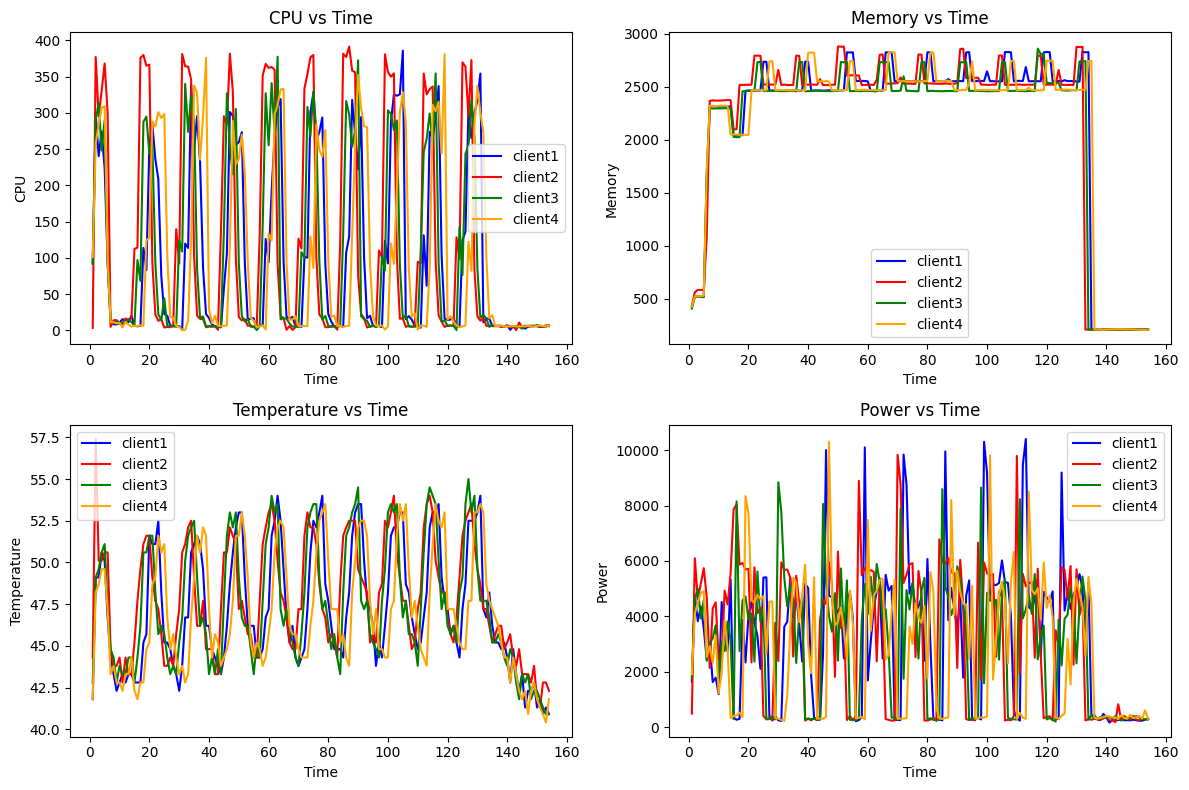

In [46]:
printPlot(['Anas2189.csv', 'Anas2191.csv', 'Anas2192.csv', 'Anas2193.csv'])

PNEUMONIAMNIST TL

Average CPU Utilization: 337.5396449704142
Standard Deviation of CPU Utilization: 78.93915657080863
Average RAM Usage: 970.6272189349113
Standard Deviation of RAM Usage: 244.51804443032216
Average Temperature: 50.248520710059196
Standard Deviation of Temperature: 1.723698600381085
Average Total Power Consumption: 0.899428 kW
Standard Deviation of Total Power Consumption: 0.0 kW


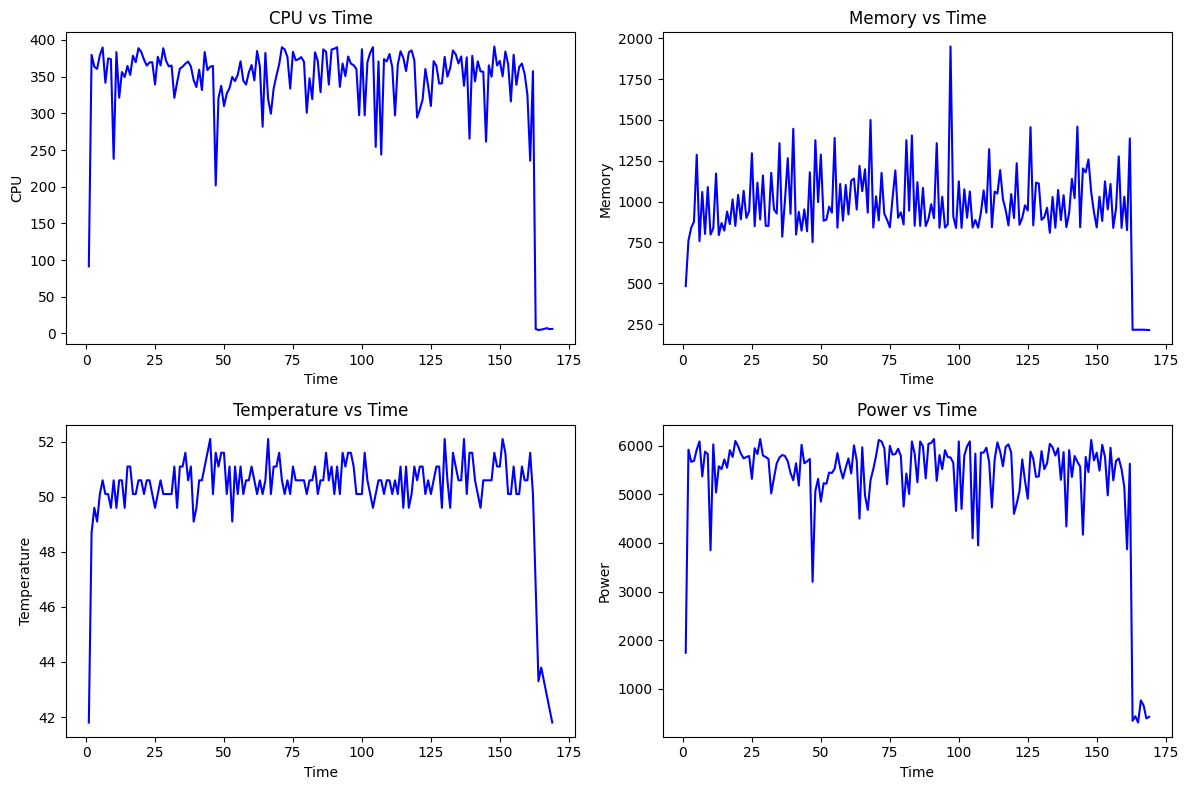

In [47]:
printPlot('Anas2189.csv')

PNEUMONIAMNIST FL+TL

Average CPU Utilization: 270.576
Standard Deviation of CPU Utilization: 100.99195276852507
Average RAM Usage: 512.785
Standard Deviation of RAM Usage: 30.638028249219957
Average Temperature: 48.724500000000006
Standard Deviation of Temperature: 2.7057068854552595
Average Total Power Consumption: 0.21618125 kW
Standard Deviation of Total Power Consumption: 0.026202867518412942 kW


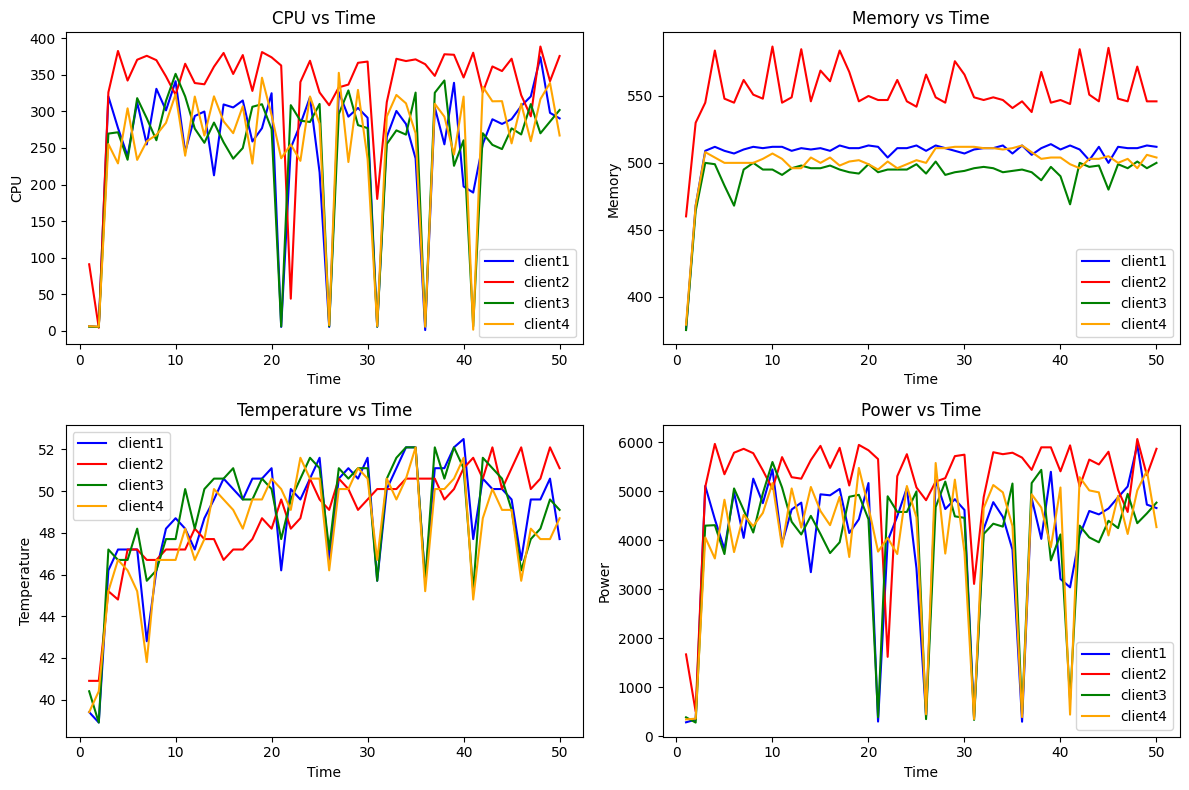

In [48]:
printPlot(['Anas2189.csv', 'Anas2191.csv', 'Anas2192.csv', 'Anas2193.csv'])

BREASTMNIST TL

Average CPU Utilization: 54.388000000000005
Standard Deviation of CPU Utilization: 62.59193762778079
Average RAM Usage: 309.44
Standard Deviation of RAM Usage: 137.38706780479743
Average Temperature: 55.672
Standard Deviation of Temperature: 12.803390800877711
Average Total Power Consumption: 0.029181 kW
Standard Deviation of Total Power Consumption: 0.0 kW


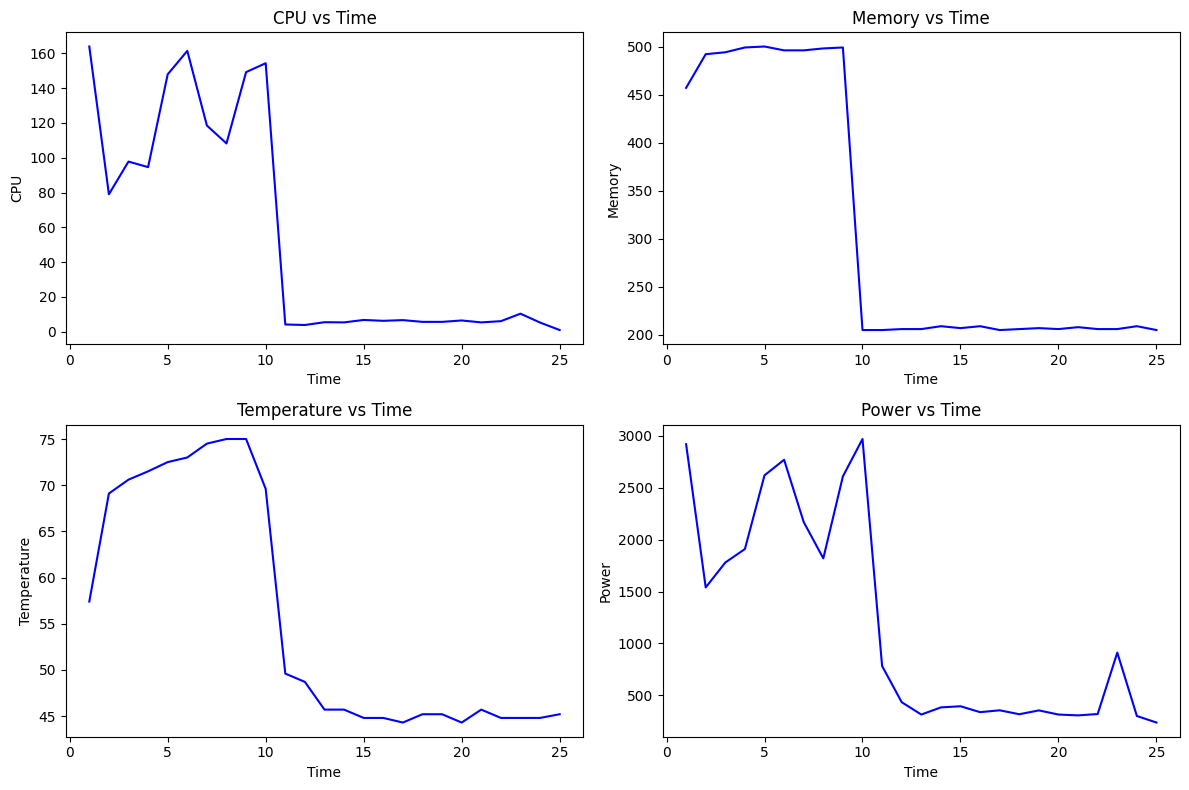

In [49]:
printPlot('Anas2189.csv')

BREASTMNIST FL+TL

Average CPU Utilization: 123.8941176470588
Standard Deviation of CPU Utilization: 129.64299609306383
Average RAM Usage: 422.47058823529414
Standard Deviation of RAM Usage: 33.43495466980068
Average Temperature: 60.3470588235294
Standard Deviation of Temperature: 9.80726727225688
Average Total Power Consumption: 0.00964525 kW
Standard Deviation of Total Power Consumption: 0.005270334447404643 kW


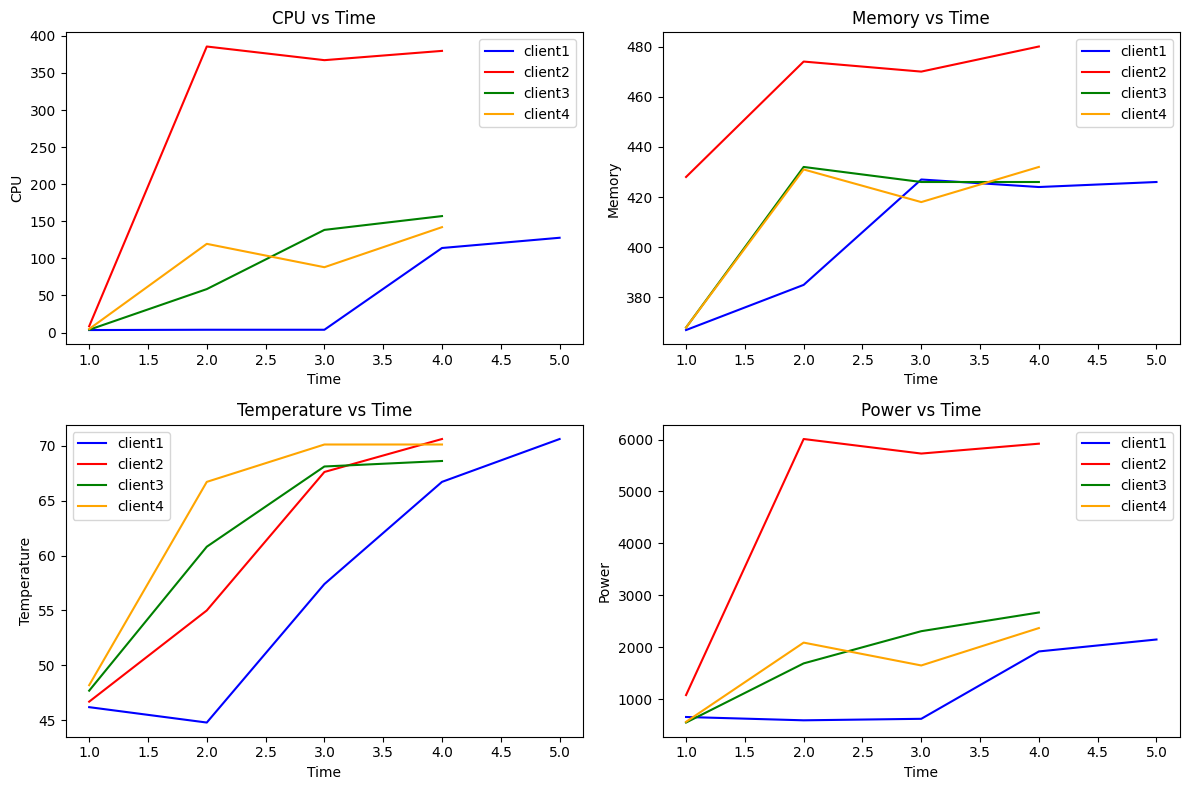

In [50]:
printPlot(['Anas2189.csv', 'Anas2191.csv', 'Anas2192.csv', 'Anas2193.csv'])

BREASTMNIST CKKS+FL+TL

Average CPU Utilization: 23.29869039623909
Standard Deviation of CPU Utilization: 52.82850869932263
Average RAM Usage: 1160.2860980523842
Standard Deviation of RAM Usage: 1104.1290710124526
Average Temperature: 42.993854936198794
Standard Deviation of Temperature: 1.6407542149877754
Average Total Power Consumption: 1.0006267500000001 kW
Standard Deviation of Total Power Consumption: 0.14692925267858503 kW


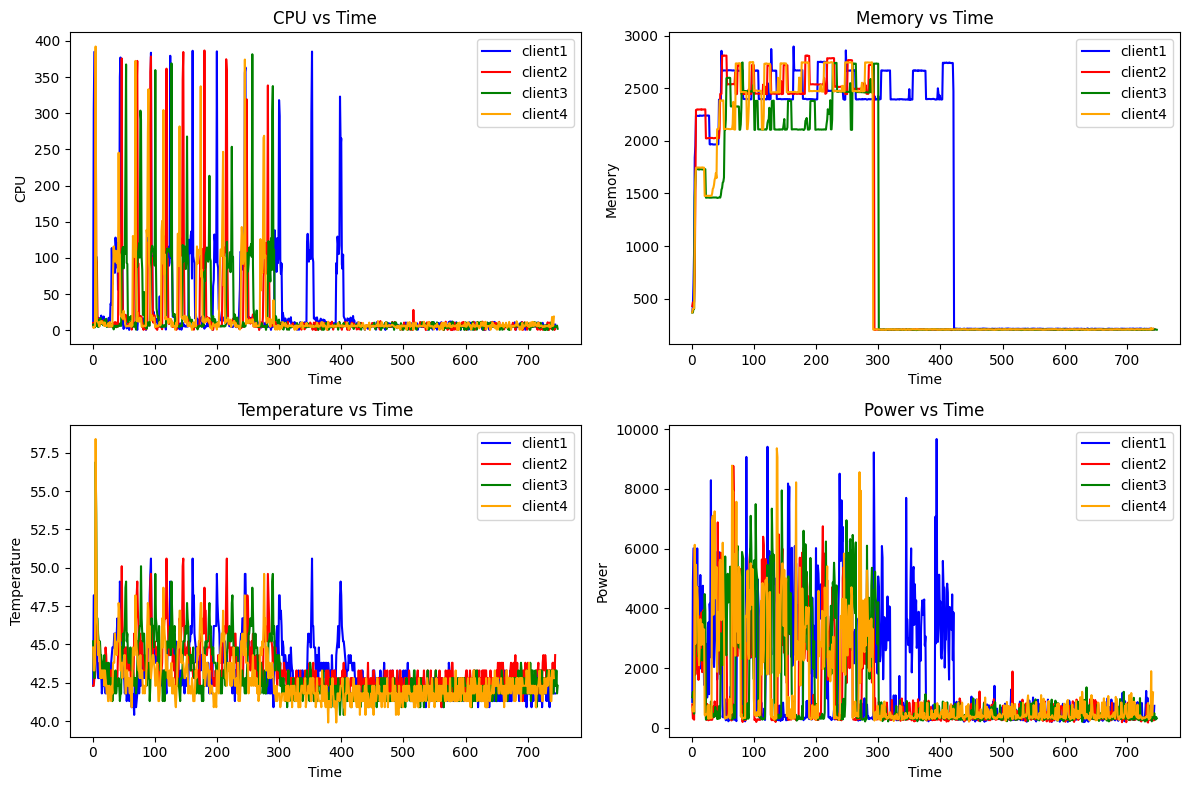

In [51]:
printPlot(['Anas2189.csv', 'Anas2191.csv', 'Anas2192.csv', 'Anas2193.csv'])